In [1]:
import torch
from diffusers import AutoPipelineForText2Image
from IPython.display import clear_output

# Let's figure out what kind of hardware torch has been built for!
if torch.cuda.is_available():
  pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sd-turbo", torch_dtype=torch.float16, variant="fp16")
  device="cuda"
  pipe.to(device)
elif torch.backends.mps.is_available():
  pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sd-turbo")
  device="mps"
  pipe.to(device)
else:
  pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sd-turbo")
  device="cpu"

clear_output()
print("Pipeline configured for " + device + " 🔥", flush=True)


Pipeline configured for mps 🔥


  0%|          | 0/1 [00:00<?, ?it/s]

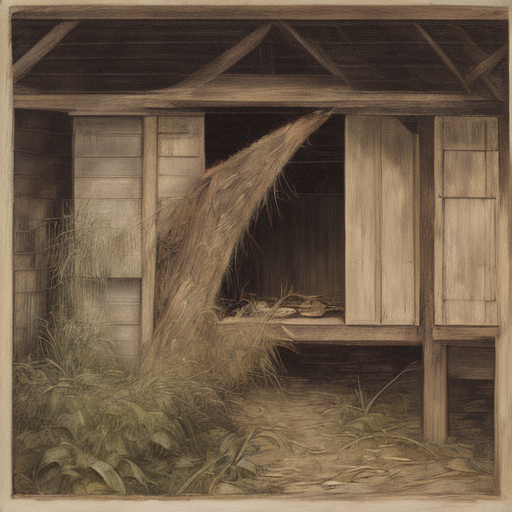

In [2]:
# configure the prompt
prompt = "a flox in a henhouse"
steps = 1

# run the pipeline
image = pipe(prompt=prompt, num_inference_steps=steps, guidance_scale=0.0).images[0]

# display the image
image
